# Simple Regression - Manual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Seed
np.random.seed(101)

In [3]:
# Create x data
x = np.linspace(0.0, 10.0, 300)

In [4]:
# Noise for y data
noise = np.random.randn(len(x))

### Linear regerssion formula

#### y = Wx + b

#### W = 0.5

#### b = 5

In [5]:
# Create y data
y_true = 0.5 * x + 5 + noise

In [6]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3, random_state=101)

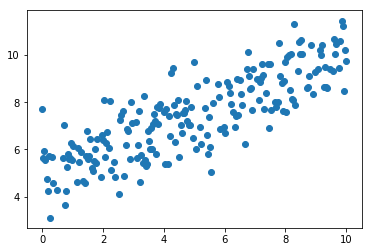

In [7]:
# Plot training data
plt.scatter(X_train,y_train)

<h1><center>ERROR FUNCTION</center></h1>

<img src="./Images/error.gif" alt="Drawing" style="width: 400px;"/>

In [8]:
# Function to compute MSE error
def mse_error(labels, predictions):
    """
        labels: y_true
        predictions: y_hat
    """
    error = 0
    for label, pred in zip(labels, predictions):
        error += (label - pred) ** 2
    return error / float(len(labels))

# It can also be done in matrix form
# return (np.sum(np.subtract(labels, predictions)**2))/len(labels)

<h1><center>GRADIENT</center></h1>

<img src="./Images/gradient.png" alt="Drawing" style="width: 500px;"/>

In [9]:
# Function to compute gradient
def gradient(features, labels, predictions):
    """
        features: x
        labels: y_true
        predictions: y_hat
    """
    w_gradient = 0
    b_gradient = 0
    N = len(features)
    for feat, label, pred in zip(features, labels, predictions):
        w_gradient += -(2/N) * feat * (label - pred)
        b_gradient += -(2/N) * (label - pred)
    return w_gradient, b_gradient

# It can also be done in matrix form
# w_gradient = np.sum(-np.dot(features, (np.subtract(labels, predictions))))*(2/len(labels))
# b_gradient = np.sum(-np.subtract(labels, predictions))*(2/len(labels))
# return w_gradient, b_gradient

In [10]:
# Randomly initialize W and b
W = np.random.randn()
b = np.random.randn()

In [ ]:
# Learning rate
learning_rate = 0.0001
# Epochs
epochs = 100000

# Trainig loop
for i in range(epochs):
    # Predictions for train data
    y_hat_train = W*X_train + b
    # Error
    error = mse_error(y_train, y_hat_train)
    # Gradient
    new_w, new_b = gradient(X_train, y_train, y_hat_train)
    # Update W
    W = W - learning_rate * new_w
    # Update b
    b = b - learning_rate * new_b
    # Print training progress
    print('Epoch: {}, Error: {}'.format(i, error))

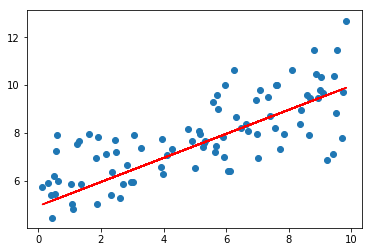

In [12]:
# Predictions for test data
y_hat_test = W*X_test + b
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, y_hat_test, 'r')

# Simple Regression - Sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create Linear Regression model
lr = LinearRegression()
# Train model (reshape X_train is necessary)
lr.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Predictions
preds = lr.predict(X_test.reshape(-1,1))

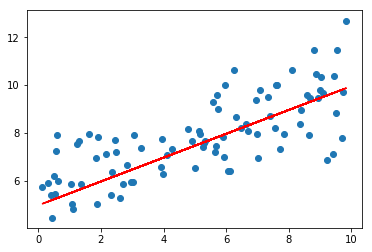

In [16]:
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, preds, 'r')